In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import scipy as sp
from scipy.stats import multivariate_normal
from scipy.stats import norm
from numpy import random as rd
from scipy import stats

from mpl_toolkits.mplot3d import axes3d
import matplotlib.pyplot as plt
from matplotlib import cm

In [6]:
def p(x):
    v = 10.0
    return 0.3 * norm.pdf(x, -20, v) + 0.7 * norm.pdf(x, 20, v)
    
def q_draw(z, v):
    return rd.normal(z, np.sqrt(v))

def q_pdf(z, zc, v):
    return norm.pdf(z, zc, np.sqrt(v))

def A(z, zt, v):
    return min(1, p(z) / p(zt))
    
def mcmc(v, it):
    zt = 0
    data = np.zeros(it)
    ans = 0
    for i in range(it):
        zs = q_draw(zt, v)
        u = rd.uniform()
        if (u <= A(zs, zt, v)):
            ans += 1
            zt = zs
        data[i] = zt
    return data, ans


0.9224
[-37.90159872 -37.90159872 -37.91459317 -37.79237396 -36.3504357
 -37.27698623 -33.92132692 -33.40728873 -32.88759126 -33.77374019]


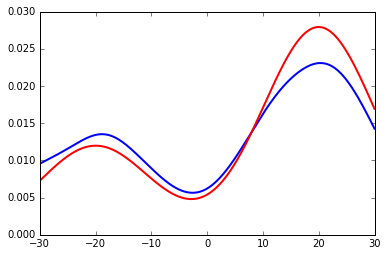

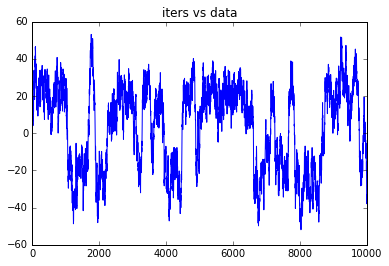

In [10]:
def sim(v, it):
    data, ans = mcmc(v, it)
    print (ans / it)
    print (data[-10:])

    kernel = stats.gaussian_kde(data)
    x = np.linspace(-30, 30, 300)
    plt.plot(x, kernel(x), label='MCMC', lw=2)
    plt.plot(x, p(x),'r', lw=2, label='real dist')
    plt.show()
    x = np.arange(0, it, 1)
    plt.plot(x, data)
    plt.title('iters vs data')
    plt.show()
    
sim(8, 10000)

0.9711
[ 32.12987406  32.02617619  31.62525737  32.70486295  32.14831507
  30.67444156  29.55735151  29.56414019  30.73805641  32.15858139]


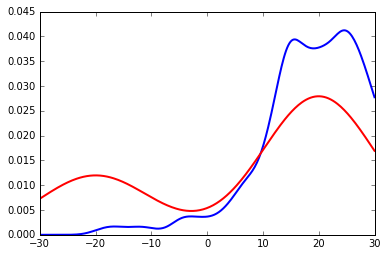

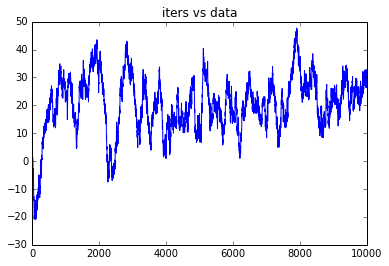

0.581
[ 26.49370824  30.04308587  12.69077528  12.69077528  47.44651299
  26.30203509  -8.18278447  17.19800874  13.19675044  13.19675044]


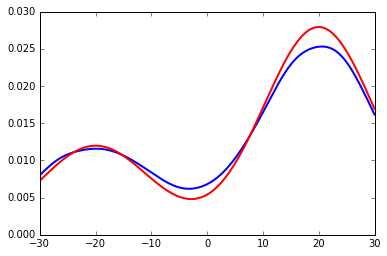

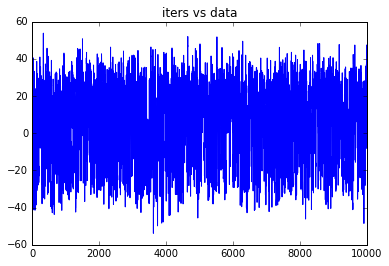

0.9215
[-17.84578346 -11.31506856 -12.14151862 -14.43301374 -15.55334892
 -15.55334892 -17.11953427 -19.52021764 -20.13131666 -17.74147561]


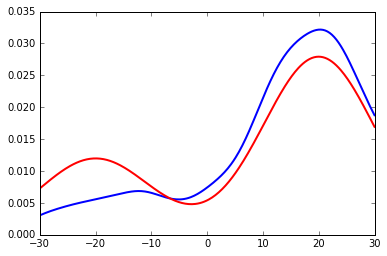

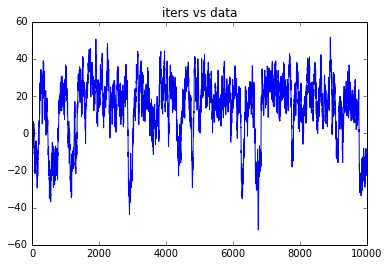

In [11]:
sim(1, 10000)
sim(500, 10000)
sim(8, 10000)

0.92144
[ 11.39790991   9.63745955  10.48279449   7.72305457   8.66161659
  12.93451805  16.40780285  16.04416116  12.84821376   9.79964889]


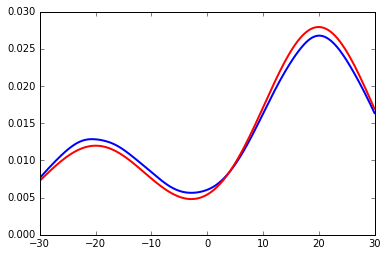

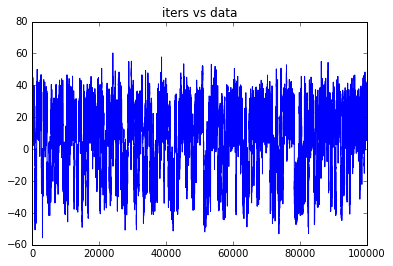

In [12]:
sim(8, 100000)